### Versions used for this code:
install if neccessary

In [1]:
pip show qiskit

Name: qiskitNote: you may need to restart the kernel to use updated packages.

Version: 2.1.1
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: C:\Users\flowe\anaconda\Lib\site-packages
Requires: dill, numpy, rustworkx, scipy, stevedore, typing-extensions
Required-by: mthree, prototype-zne, qiskit-aer, qiskit-ibm-provider, qiskit-ibm-runtime, qiskit-qasm3-import, qiskit-transpiler-service


In [2]:
pip show qiskit-ibm-runtime

Name: qiskit-ibm-runtime
Version: 0.41.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: C:\Users\flowe\anaconda\Lib\site-packages
Requires: ibm-platform-services, numpy, packaging, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3
Required-by: mthree
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show qiskit-aer

Name: qiskit-aer
Version: 0.17.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: C:\Users\flowe\anaconda\Lib\site-packages
Requires: numpy, psutil, python-dateutil, qiskit, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show qiskit-ibm-provider

Name: qiskit-ibm-provider
Version: 0.11.0
Summary: Qiskit IBM Quantum Provider for accessing the quantum devices and simulators at IBM
Home-page: https://github.com/Qiskit/qiskit-ibm-provider
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: C:\Users\flowe\anaconda\Lib\site-packages
Requires: numpy, python-dateutil, qiskit, requests, requests-ntlm, typing-extensions, urllib3, websocket-client, websockets
Required-by: 
Note: you may need to restart the kernel to use updated packages.


### Encoding circuit examples:

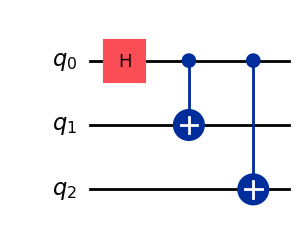

In [5]:
## 3-qubit

from qiskit import*

qreg = QuantumRegister(3,'q') # only use gates
circuit = QuantumCircuit(qreg) # only use gates

'Copy this:'

circuit.h(qreg[0])
circuit.cx(qreg[0],qreg[1])
circuit.cx(qreg[0],qreg[2])

circuit.draw('mpl')


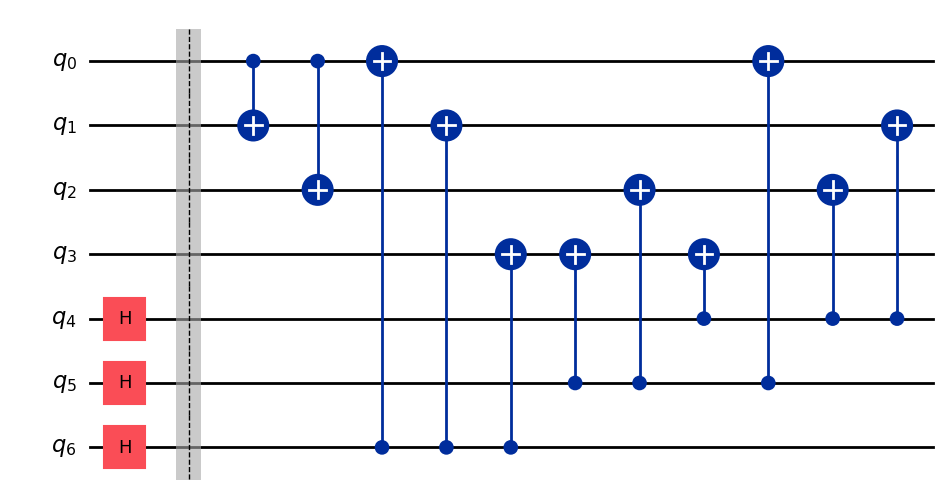

In [6]:
## Steane 

from qiskit import*

qreg = QuantumRegister(7,'q') # only use gates
circuit = QuantumCircuit(qreg) # only use gates

'Copy this:'

for i in range(3):
    circuit.h(qreg[i+4])

circuit.barrier()

circuit.cx(qreg[0],qreg[1])
circuit.cx(qreg[0],qreg[2])
    
circuit.cx(qreg[6],qreg[0])
circuit.cx(qreg[6],qreg[1])
circuit.cx(qreg[6],qreg[3])
    
circuit.cx(qreg[5],qreg[3])
circuit.cx(qreg[5],qreg[2])
circuit.cx(qreg[5],qreg[0])

circuit.cx(qreg[4],qreg[3])
circuit.cx(qreg[4],qreg[2])
circuit.cx(qreg[4],qreg[1])


circuit.draw('mpl')

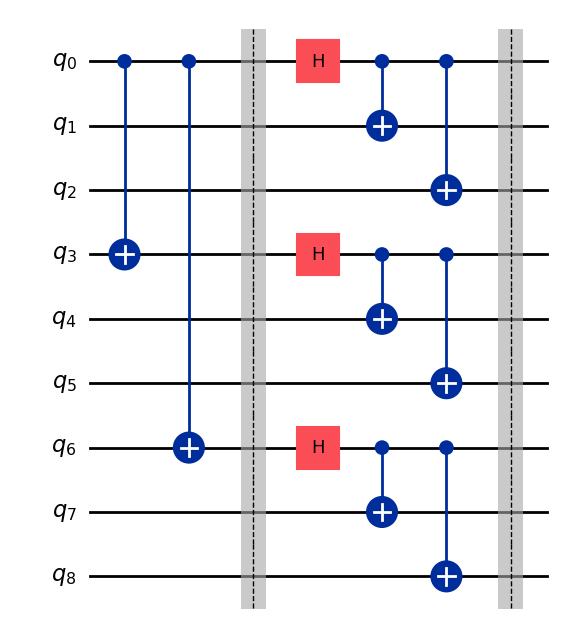

In [7]:
## Shor

from qiskit import*
from qiskit.quantum_info import Statevector, StabilizerState, Clifford

qreg = QuantumRegister(9,'q') # only use gates
circuit = QuantumCircuit(qreg) # only use gates

'Copy this:'

circuit.cx(qreg[0],qreg[3])
circuit.cx(qreg[0],qreg[6])
circuit.barrier()


circuit.h(qreg[0])
circuit.h(qreg[3])
circuit.h(qreg[6])

circuit.cx(qreg[0],qreg[1])
circuit.cx(qreg[0],qreg[2])
circuit.cx(qreg[3],qreg[4])
circuit.cx(qreg[3],qreg[5])
circuit.cx(qreg[6],qreg[7])
circuit.cx(qreg[6],qreg[8])
circuit.barrier()

circuit.draw('mpl')

### To obtain QEC circuit:

X-error stabilizers for this encoding scheme are: ['ZZIIZZI', 'ZIZIZIZ', 'IIIZZZZ']
Z-error stabilizers for this encoding scheme are: ['IXXXXII', 'XIXXIXI', 'XXIXIIX']
Results for x errors:
(0,) : 110000 ancilla bit to flip: [2]
(1,) : 100000 ancilla bit to flip: [1, 2]
(2,) : 010000 ancilla bit to flip: [0, 2]
(3,) : 001000 ancilla bit to flip: [0, 1]
(4,) : 111000 ancilla bit to flip: []
(5,) : 101000 ancilla bit to flip: [1]
(6,) : 011000 ancilla bit to flip: [0]
Results for z errors:
(0,) : 000011 ancilla bit to flip: [3]
(1,) : 000101 ancilla bit to flip: [4]
(2,) : 000110 ancilla bit to flip: [5]
(3,) : 000111 ancilla bit to flip: []
(4,) : 000100 ancilla bit to flip: [4, 5]
(5,) : 000010 ancilla bit to flip: [3, 5]
(6,) : 000001 ancilla bit to flip: [3, 4]


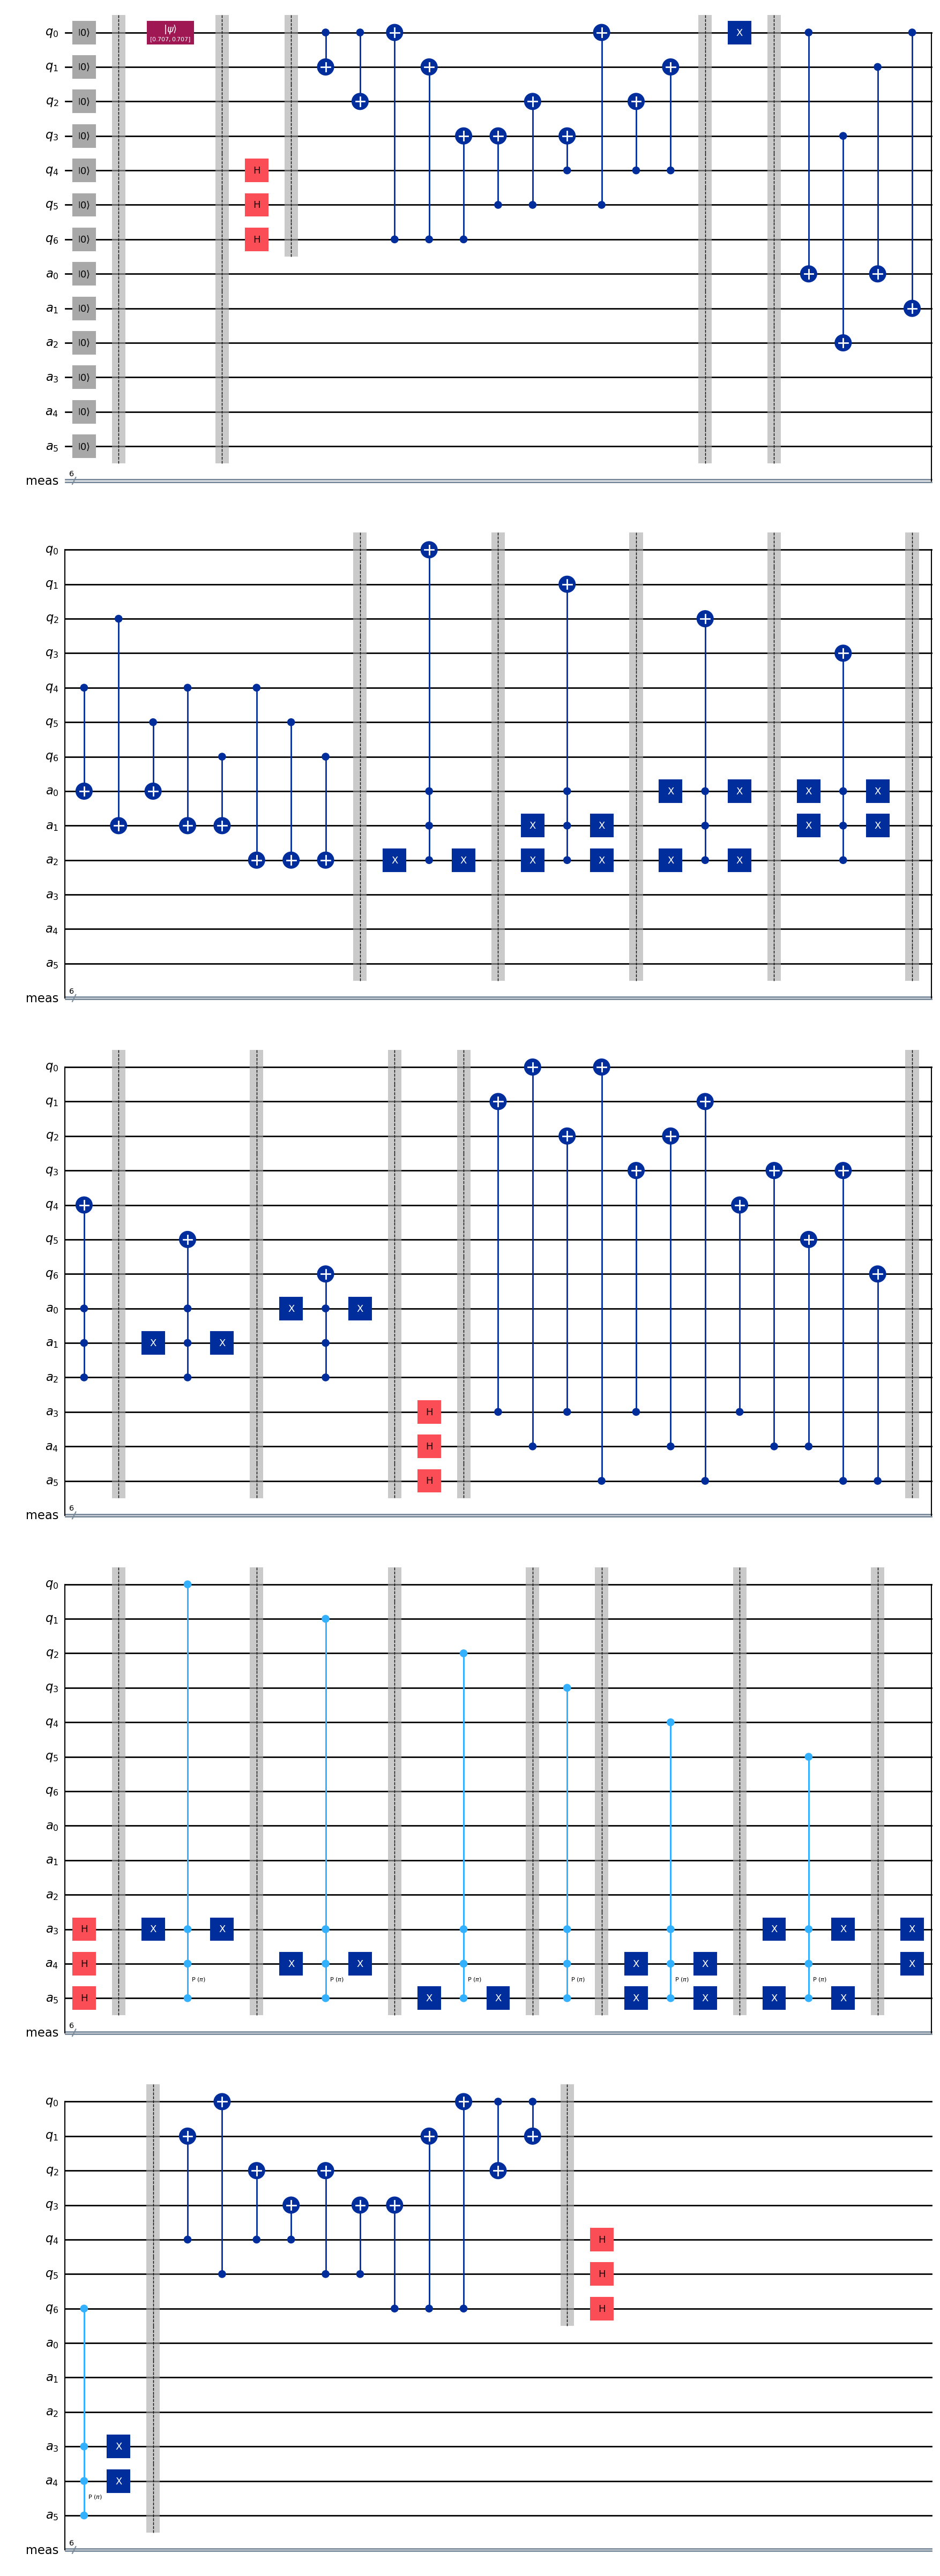

In [8]:
# Example here is Steane

from qiskit import* #Imports all qiskit objects
from qiskit_aer import AerSimulator #To simulate circuit and check state information
from qiskit.visualization import plot_histogram #Plot state information graphically
import qiskit.quantum_info as qi # To check statevector of desired state
from qiskit.quantum_info import Statevector, StabilizerState, Clifford # To check statevector of desired state

# Math libraries
from itertools import combinations 
from collections import Counter
import math
import numpy as np
import matplotlib.pyplot as plt

'To use the algorithm: 1) input parameters: t, n 2) input encoding scheme in det_gen_circ()'


'Input parameters here:'

t = 1 # t = # of errors the encoding scheme can correct (reliably works for single errors, future work needed)
n = 7 # n = # of qubits in encoding scheme

'If testing the code choose a state, test qubit, and test error type:'
'If generating the circuit for use, comment out test_qubit, test_error, & input desired state'

state = [1/np.sqrt(2), (1/ np.sqrt(2))]
#Possible test states, not exhaustive'
# [1,0] : |0> state, [0,1] : |1> state, [1/np.sqrt(2), (1/ np.sqrt(2))] :  even superposition state, 
# [1/np.sqrt(2),(np.exp(1j *np.pi / 2)) / np.sqrt(2)] : Some arbitrary state
test_qubit = 0 # qubit where error will be applied
test_error = 'X' # Choose 'X', "Y', or 'Z'



d = 2*t+1 # Code distance
code_len = n
k = 1 # number of logical qubits (reliably works for single logical qubt, future work needed)

# Generate stabilizers   
def det_gen_circ():
    
    qreg = QuantumRegister(code_len, 'q') # Encoding register
    circuit = QuantumCircuit(qreg) #Circuit without ancilla register


    'Input Encoding Scheme here. Note: must use clifford gates to obtain stabilizers'
    
    for i in range(3):
        circuit.h(qreg[i+4])

    circuit.barrier()
    
    circuit.cx(qreg[0],qreg[1])
    circuit.cx(qreg[0],qreg[2])
        
    circuit.cx(qreg[6],qreg[0])
    circuit.cx(qreg[6],qreg[1])
    circuit.cx(qreg[6],qreg[3])
        
    circuit.cx(qreg[5],qreg[3])
    circuit.cx(qreg[5],qreg[2])
    circuit.cx(qreg[5],qreg[0])
    
    circuit.cx(qreg[4],qreg[3])
    circuit.cx(qreg[4],qreg[2])
    circuit.cx(qreg[4],qreg[1])


    stab_class = StabilizerState(circuit) # Obtain stabilizer class for circuit
    cliff = stab_class.clifford  # Converts to usable list of stabilizers/destabilizers
    stab = cliff.to_labels(mode="S") # Removes destabilizers

    
    stab_list = []
    # Strips + sign from list
    for i in range(len(stab)):
        stab_string = stab[i].strip('+')
        stab_list.append(stab_string)

    
    z_stabilizers = []
    x_stabilizers = []

    # Seperate out X and Z stabilizers 
    for stab in stab_list:
        if 'Z' in stab:
            x_stabilizers.append(stab)
        else:
            z_stabilizers.append(stab)

    # Filter out extraneous stabilizer
    x_stabilizers = [stab for stab in x_stabilizers if stab.count('Z') != d]
    z_stabilizers = [stab for stab in z_stabilizers if stab.count('X') != d]

    # Reverse the order of each stabilizer (Qiskit orders qubits by last to first)
    x_stabilizers = [stab[::-1] for stab in x_stabilizers]
    z_stabilizers = [stab[::-1] for stab in z_stabilizers]
        
    
    return x_stabilizers, z_stabilizers, circuit


x_stabilizers, z_stabilizers, circuit = det_gen_circ()

print(f'X-error stabilizers for this encoding scheme are: {x_stabilizers}')
print(f'Z-error stabilizers for this encoding scheme are: {z_stabilizers}')


# Create full encoding circuit & initializes states
def encoding():
    
    x_stabilizers, z_stabilizers, original_circuit = det_gen_circ() # Obtain inputted encoding circuit

    qreg = QuantumRegister(code_len, 'q')  
    'Ensure ancilla & measurement registers have an appropiate amount of qubits'
    
    areg = QuantumRegister(code_len-k, 'a')  # Ancilla register
    meas = ClassicalRegister(code_len-k, 'meas')  # Classical register
    circuit = QuantumCircuit(qreg, areg, meas)

    # Initialize all qubits to |0>
    circuit.reset(qreg[0:])
    circuit.reset(areg)
    circuit.barrier()

    # Initialize test state
    input = state 
    circuit.initialize(input, qreg[0])
    circuit.barrier()

    # Copy gates from the first encoding scheme input
    encoding_instructions = []
    for instruction in original_circuit.data:
        qubits = [qreg[original_circuit.qubits.index(q)] for q in instruction.qubits]
        circuit.append(instruction.operation, qubits, instruction.clbits)
        encoding_instructions.append((instruction.operation, qubits, instruction.clbits)) # Encoding instructions for decoding()
    
    return circuit, qreg, areg, meas, encoding_instructions

# Reverses order of encoding circuit gates
def decoding(circuit, encoding_instructions):

    # Reverse only the encoding instructions
    for op, qubits, clbits in reversed(encoding_instructions):
        inverse_op = op.inverse()
        circuit.append(inverse_op, qubits, clbits)
    
    return circuit
    
# Z syndrome detection function detects Z errors using X stabilizers
if z_stabilizers:
    def z_syn(circuit,qreg,areg):
    
        x_stab,z_stab,original_circuit = det_gen_circ() # Obtain stabilizers from detection generation function
        circuit.h(areg[-len(z_stab):]) # Add Hadamards to change basis
        circuit.barrier()
        for s in range(len(z_stab)):
            position = [s for s, x in enumerate(z_stab[s]) if x == 'X'] # Create a list of positions of non-identity operators
            for pos in position:
                circuit.cx(areg[s+len(x_stab)], qreg[pos]) # Apply a cx-gate for each non-identity operator to form detection scheme
        circuit.barrier()
        circuit.h(areg[-len(z_stab):])
        circuit.barrier()
    
        return circuit

# X syndrome detection function detects X errors using Z stabilizers
def x_syn(circuit, qreg, areg):
    
    
    x_stab,z_stab,original_circuit = det_gen_circ()
    for s in range(len(x_stab)):
        position = [s for s, x in enumerate(x_stab[s]) if x == 'Z'] # Create a list of positions of non-identity operators
        for pos in position:
            circuit.cx(qreg[pos], areg[s]) # Apply a cx-gate for each non-identity operator to form detection scheme
    circuit.barrier()
  
    return circuit

# Introduce possibles errors for detection scheme simulation
def introduce_error(circuit, qreg, error_type, qubit_list):

    for i, qubit in enumerate(qubit_list):
        if error_type[i] == 'x':  #Applies X errors
            circuit.x(qreg[qubit])
        elif error_type[i] == 'z': #Applies Z errors
            circuit.z(qreg[qubit])
    circuit.barrier()

    return circuit

# Create X-error sinature
def get_x_error_signature(error, qubit_list):
    
    x_stab, z_stab,original_circuit = det_gen_circ()
    circuit, qreg, areg, meas,encoding_instructions = encoding()  # Create circuit
    circuit = introduce_error(circuit, qreg, 'x', qubit_list)  # Introduce errors
    circuit = x_syn(circuit, qreg, areg)
    circuit.measure(areg[0:len(x_stab)], meas[0:len(x_stab)]) # Measures x ancilla qubits

    simulator = AerSimulator()  # Simulate the circuit
    sim_result = simulator.run(circuit).result()

    ancilla_state = list(sim_result.get_counts(circuit).keys())[0]  # Obtain ancilla state error signature
    ancilla_state_reversed = ancilla_state[::-1] # Reverse string
    flipped_digits = [i for i, char in enumerate(ancilla_state_reversed) if char == '0' and i < len(x_stab)] # Track unflipped ancillas
    print(qubit_list, ":", ancilla_state_reversed, "ancilla bit to flip:", flipped_digits)

    return flipped_digits

if z_stabilizers:
# Create Z-error signature
    def get_z_error_signature(error, qubit_list):
        x_stab, z_stab,original_circuit = det_gen_circ()
        circuit, qreg, areg, meas,encoding_instructions = encoding()  # Create circuit
        circuit = introduce_error(circuit, qreg, 'z', qubit_list)  # Introduce errors
        circuit = z_syn(circuit, qreg, areg)  # Detect Z errors
        circuit.measure(areg[len(x_stab):], meas[len(x_stab):])  # Measure z ancilla qubits
    
        simulator = AerSimulator()  # Simulate the circuit
        sim_result = simulator.run(circuit).result()
    
        z_ancilla_state = list(sim_result.get_counts(circuit).keys())[0]  # Obtain ancilla state error signature 
        z_ancilla_state_reversed = z_ancilla_state[::-1] # Reverse string
        z_flipped_digits = [i for i, char in enumerate(z_ancilla_state_reversed) if char == '0' and i > len(x_stab)-1] # Track unflipped ancillas
        print(qubit_list, ":", z_ancilla_state_reversed, "ancilla bit to flip:", z_flipped_digits)
    
    
        return z_flipped_digits

# Obtain X-error dictionary
def get_x_error_signature_dict(error_list):
    
    x_error_sig_dict = {}
    idx = 0

    for error in error_list:
        qubit_locations = list(combinations(range(code_len), len(error))) 
        for qubit_location in qubit_locations:
            flipped_x_bits = get_x_error_signature(error, qubit_location) # Uses x error signature info to populate error dictionary 
            x_error_sig_dict[idx] = [flipped_x_bits, qubit_location]
            idx += 1

    return x_error_sig_dict

    
# Obtain Z-error dictionary
if z_stabilizers:
    def get_z_error_signature_dict(error_list):
        z_error_sig_dict = {}
        unique_signatures = set()  # To track unique flipped ancilla bit sets
        idx = 0
    
        for error in error_list:
            # Generate all possible qubit location combinations
            qubit_locations = list(combinations(range(code_len), len(error)))
            for qubit_location in qubit_locations:
                flipped_z_bits = get_z_error_signature(error, qubit_location)
                flipped_z_bits_tuple = tuple(flipped_z_bits)  # Convert to tuple for 
    
              # Only add if the signature is unique
                if flipped_z_bits_tuple not in unique_signatures:
                    unique_signatures.add(flipped_z_bits_tuple)
                    z_error_sig_dict[idx] = [flipped_z_bits, qubit_location]
                    idx += 1
    
        return z_error_sig_dict

# Generates error list for t # of errors 
error_list = []
for j in range(1, t + 1):
    error_list.extend(['t'] * j)
 

# Prints error signature information & error dictionary 
print("Results for x errors:")
x_error_sig_dict = get_x_error_signature_dict(error_list)

if z_stabilizers:
    print("Results for z errors:")
    z_error_sig_dict = get_z_error_signature_dict(error_list)

# Corrects X-errors
def x_corr(circuit,qreg,areg):

    x_stab, z_stab,original_circuit = det_gen_circ()
    x_errorDict = x_error_sig_dict
    for key in x_errorDict:
        for i in x_errorDict[key][0]:
            if i < len(x_stab):
                circuit.x(areg[i]) #applies X-gates based on dictionary information
        for j in x_errorDict[key][1]:
            if z_stab:
                circuit.mcx(areg[:-len(z_stab)],qreg[j]) # Applies toffoli gates
            else:
                circuit.mcx(areg[:len(x_stab)],qreg[j]) 
        for i in x_errorDict[key][0]:
            if i < len(x_stab):
                circuit.x(areg[i])
        circuit.barrier()

    return circuit

# Correctz Z-errors
if z_stabilizers:
    def z_corr(circuit, qreg, areg):
        
        x_stab, z_stab,original_circuit = det_gen_circ()
        z_errorDict = z_error_sig_dict
        for key in z_errorDict:
            for i in z_errorDict[key][0]:
                circuit.x(areg[i]) # Applies X-gates based on dictionary information
            for j in z_errorDict[key][1]:
                circuit.mcp(np.pi,areg[-len(z_stab):],qreg[j]) # Applies multi-control phase gates
            for i in z_errorDict[key][0]:
                circuit.x(areg[i])
            circuit.barrier()
            
        return circuit

# General error function compiles all functions needed to correct t # of errors 

# Applies full algorithm if code can handle Z-errors
if z_stabilizers:
    def gen_error():
        circuit, qreg, areg, meas, encoding_instructions = encoding()
        circuit.barrier()
        if test_error == "X":
            circuit.x(qreg[test_qubit])
        elif test_error == "Y":
            circuit.y(qreg[test_qubit])
        elif test_error == "Z":
            circuit.z(qreg[test_qubit])
        else:
            raise ValueError("test_error must be 'X', 'Y', or 'Z'")
        circuit.barrier()
        x_syn(circuit, qreg, areg)
        x_corr(circuit,qreg,areg)
        z_syn(circuit, qreg, areg)
        z_corr(circuit, qreg, areg)
        decoding(circuit,encoding_instructions)
    
        return circuit, qreg, areg, meas
        
# Only applies X-error correction circuit if applicable
else:
    def gen_error():
        circuit, qreg, areg, meas,encoding_instructions = encoding()
        circuit.barrier()
        if test_error == "X":
            circuit.x(qreg[test_qubit])
        elif test_error == "Y":
            circuit.y(qreg[test_qubit])
        elif test_error == "Z":
            circuit.z(qreg[test_qubit])
        else:
            raise ValueError("test_error must be 'X', 'Y', or 'Z'")
        circuit.barrier()
        x_syn(circuit, qreg, areg)
        x_corr(circuit,qreg,areg)
        decoding(circuit,encoding_instructions)
    
        return circuit, qreg, areg, meas

circuit, qreg, areg, meas = gen_error()

#Draw the circuit
circuit.draw('mpl')

## Checking State Fidelity

In [9]:
'Shows output state of the circuit'

import qiskit.quantum_info as qi 
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

psi = qi.Statevector.from_instruction(circuit)

l_state = qi.partial_trace(psi, list(range(1, len(qreg) + len(areg))))

l_state.draw('latex',prefix = '|\\psi\\rangle = ')

psi = l_state.to_statevector()

# Display result
psi.draw('latex', prefix='|\\psi\\rangle = ')

<IPython.core.display.Latex object>

In [10]:
'Checks if output state = initial state'

input = Statevector(state)
equiv = input.equiv(psi)
if equiv == True:
    print("The input and output state are equivalent, up to a global phase")
else:
    print("The input and output state are not equivalent")

The input and output state are equivalent, up to a global phase
